<a href="https://colab.research.google.com/github/elinteerie/Nigeria-Food-AI/blob/main/Nigeria_Food_AI_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Nigeria Food AI


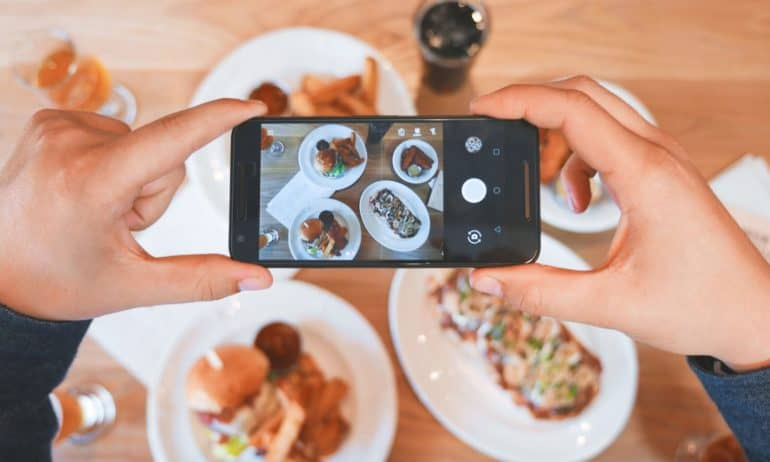

Artificial Intelligence and Deep Learning Solutions for Nigeria/Africa Food Recognition

We automate, optimize and provide an added value to processes related to food and nutrition.

Upload a picture and receive all detailed nutrients

Features//
Version 1: Dish names
Second Release: Food groups
Third Release: Micro and Macro Nutrients
Fourth Release: Ingredients
Fifth Release: Food Group
Sixth: & lots more

This Nigeria Indigenous AI will be trained on the following food:

For the First Version and testing

* Akara and Bread
* Banga Soup
* Bitterleaf Soup
* Edikakong
* Egusi
* Ewedu
* Garri and Groundnut 
* Jellof
* Moi-moi
* Nkwobi
* Ofe-owerri
* Ogbono
* Okra
* Puff puff
---
> Dataset was pulled from bing and facebook by Igwe Ugochukwu (Elint Eerie)


